In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [154]:
df= pd.read_csv('Consumo_cerveza.csv',index_col=0)
df = df.drop_duplicates() # elimina datos dulicados
df = df.dropna() # elimina NAN
print (df.dtypes)

Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitaciones (mm)            object
Fin de Semana                  float64
Consumo de cerveza (litros)    float64
dtype: object


El objetivo de los modelos es predecir el consumo de litros de cerveza, por ello se establecerá como target.

In [155]:
target = pd.DataFrame(df['Consumo de cerveza (litros)'])

### Ejercicio 1

Podemos observar que las variables independientes que vamos a utilizar, se encuentran en un tipo de dato no numerico, por lo que necesitamos transformarlas para poder utilizarlas.

In [156]:
df['Temperatura Minima (C)'] = (df['Temperatura Minima (C)'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df['Temperatura Maxima (C)'] = (df['Temperatura Maxima (C)'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

### Consumo según temperatura mínima

Se va a realizar un modelo de regresión lineal simple, tomando como variable independiente la temperatura minima 

In [157]:
datos1 = pd.DataFrame(df['Temperatura Minima (C)'])

In [158]:
#Creamos los conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(datos1, target, test_size=0.2)

In [159]:
modelo1 = linear_model.LinearRegression()
regres1 = modelo1.fit(datos1,target)
coef_deter= modelo1.score(datos1,target)
coeficiente = modelo1.coef_
print('Coeficiente de determinación: ', coef_deter)
print('Interccepto: ', modelo1.intercept_)
print('Coeficientes: ', coeficiente)

Coeficiente de determinación:  0.1540631083123537
Interccepto:  [14.73307043]
Coeficientes:  [[0.61096562]]


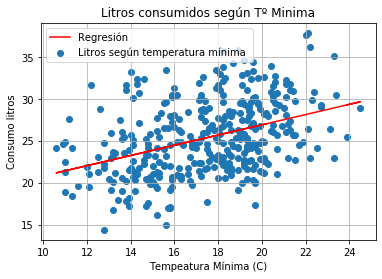

In [160]:
predicciones = modelo1.predict(datos1)
plt.scatter(datos1, target)
plt.title('Litros consumidos según Tº Minima')
plt.plot(datos1, predicciones, color='red')
plt.xlabel('Tempeatura Mínima (C)')
plt.ylabel('Consumo litros')
plt.legend(["Regresión", "Litros según temperatura mínima "])
plt.grid(True)
plt.show()

Se puede observar en los datos obtenidoos del modelo, que es un modelo con un valor bajo de coeficiente de correlación, un 15.4%, lo que implica un ajuste pequeño, es decir, que la predicción es acertada en ese porcentaje. Por ultimo, vemos que la temperatura mínima tiene una relación lineal positiva de 0.6109, es decir que cuando el consumo aument en 1 unidad, la temperatura lo hace en 0.6109 unidades.

##### Predicciones para difeentes valores de temperaturas minimas

In [293]:
temps = [[14], [16], [22], [12]]
predicion = modelo1.predict(temps)
for x in range (0, len(predicion)):
    if x== 0:
        print("La consumición cuando la temperatura mínima es de ", temps[x], "grados, se consumen ", predicion[x])
    elif x== 1:
        print("La consumición cuando la temperatura mínima es de ", temps[x], "grados se consumen ", predicion[x])
    elif x== 2:
        print("La consumición cuando la temperatura mínima es de ", temps[x], "grados se consumen ", predicion[x])
    else:
        print("La consumición cuando la temperatura mínima es de ", temps[x], "grados se consumen ", predicion[x])

La consumición cuando la temperatura mínima es de  [14] se consumen  [23.28658913]
La consumición cuando la temperatura mínima es de  [16] se consumen  [24.50852038]
La consumición cuando la temperatura mínima es de  [22] se consumen  [28.17431411]
La consumición cuando la temperatura mínima es de  [12] se consumen  [22.06465789]


### Consumo según temperatura máxima

In [161]:
datos2 = pd.DataFrame(df['Temperatura Maxima (C)'])
modelo2 = linear_model.LinearRegression()
regres = modelo2.fit(datos2,target)
coef_deter2= modelo2.score(datos2,target)
coeficiente2 = modelo2.coef_
print('Coeficiente de determinación: ', coef_deter2)
print('Interccepto: ', modelo2.intercept_)
print('Coeficientes: ', coeficiente2)

Coeficiente de determinación:  0.413027909953363
Interccepto:  [7.97493938]
Coeficientes:  [[0.65484558]]


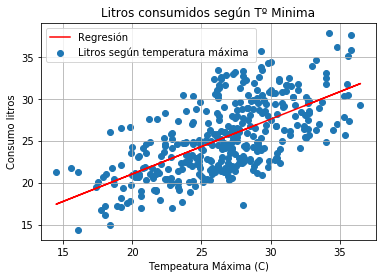

In [162]:
predicciones2 = modelo2.predict(datos2)
plt.scatter(datos2, target)
plt.title('Litros consumidos según Tº Minima')
plt.plot(datos2, predicciones2, color='red')
plt.xlabel('Tempeatura Máxima (C)')
plt.ylabel('Consumo litros')
plt.legend(["Regresión", "Litros según temperatura máxima "])
plt.grid(True)
plt.show()

Se puede observar en los datos obtenidoos del modelo, que es un modelo con un valor medio de coeficiente de correlación, un 41.3%, lo que implica un ajuste decente, es decir, que la predicción es acertada en ese porcentaje de veces.
Por ultimo, vemos que la temperatura mínima tiene una relación lineal positiva de 0.6548, es decir que cuando el consumo aument en 1 unidad, la temperatura lo hace en 0.6548 unidades.

Entre ambos modelos destaca que el segundo de ellos tiene una tasa mayor de acierto y está mejor ajustado. Tambien que la temperatura maxima influye un poco más que la mínima a la hora de consumir cerveza.

#### Predicciones para diferente valores de temperatura maxima

In [300]:
tempsMax = [[14], [34], [25.2], [28]]
predicion2 = modelo2.predict(tempsMax)
for x in range (0, len(predicion2)):
    if x== 0:
        print("La consumición cuando la temperatura máxima es de ", tempsMax[x], "grados, se consumen ", predicion2[x], "litros de cerveza ")
    elif x== 1:
        print("La consumición cuando la temperatura máxima es de ", tempsMax[x], "grados se consumen ", predicion2[x], "litros de cerveza ")
    elif x== 2:
        print("La consumición cuando la temperatura máxima es de ", tempsMax[x], "grados se consumen ", predicion2[x], "litros de cerveza ")
    else:
        print("La consumición cuando la temperatura máxima es de ", tempsMax[x], "grados se consumen ", predicion2[x], "litros de cerveza ")

La consumición cuando la temperatura máxima es de  [14] grados, se consumen  [17.14277756] litros de cerveza 
La consumición cuando la temperatura máxima es de  [34] grados se consumen  [30.23968924] litros de cerveza 
La consumición cuando la temperatura máxima es de  [25.2] grados se consumen  [24.4770481] litros de cerveza 
La consumición cuando la temperatura máxima es de  [28] grados se consumen  [26.31061573] litros de cerveza 


### Ejercicio 2

Al igual que ocurria en los modelos anteriores, la variable independiente hay que transformarla a un tipo que se pueda utilizar en el modelo de regreión

In [163]:
df['Precipitaciones (mm)'] = (df['Precipitaciones (mm)'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

In [166]:
datos_lluvia=pd.DataFrame(df['Precipitaciones (mm)'])

In [169]:
modelo_precip = linear_model.LinearRegression()
regres_precip = modelo_precip.fit(datos_lluvia,target)
coef_deter_lluvia =  modelo_precip.score(datos_lluvia,target)
coeficiente_lluvia = modelo_precip.coef_
print('Coeficiente de determinación: ',coef_deter_lluvia)
print('Interccepto: ', modelo_precip.intercept_)
print('Coeficientes: ', coeficiente_lluvia)

Coeficiente de determinación:  0.03755235653680466
Interccepto:  [25.75812135]
Coeficientes:  [[-0.06864999]]


Se puede observar que en este caso, la variable independiente(precipitaciones) posee una relacion lineal negativa respecto a la dependiente (consumo). Por otro lado, este modelo tiene un coeficiente de determinacion realmente bajo, lo que implica que no sea un modelo muy bien ajustado, por lo que será poco fiable.

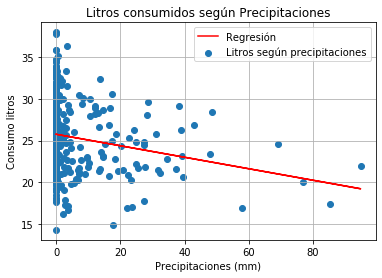

In [172]:
predic_lluvia = modelo_precip.predict(datos_lluvia)
plt.scatter(datos_lluvia, target)
plt.title('Litros consumidos según Precipitaciones')
plt.plot(datos_lluvia, predic_lluvia, color='red')
plt.xlabel('Precipitaciones (mm)')
plt.ylabel('Consumo litros')
plt.legend(["Regresión", "Litros según precipitaciones"])
plt.grid(True)
plt.show()

Se puede observar claramente la linealiad negativa entre ambas variables puesto que la linea de la regresión vemos claramente cómo baja. Por otro lado, como era de esperr, se puede afirmar que en cuanto menores sean las precipitaciones, es cuando generalmente existe un mayor consumo de cerveza.

#### Prediccion para diferentes valores de precipitaciones

In [299]:
precip = [[0.002], [61], [25.2], [12]]
pred_lluvias = modelo_precip.predict(precip)
for x in range (0, len(pred_lluvias)):
    if x== 0:
        print("La consumición cuando las precipitaciones alcanzan un nivel dee ", precip[x], "mm, se consumen ", pred_lluvias[x], "litros de cerveza ")
    elif x== 1:
        print("La consumición cuando las precipitaciones alcanzan un nivel de ", precip[x], "mm se consumen ", pred_lluvias[x], "litros de cerveza ")
    elif x== 2:
        print("La consumición cuando las precipitaciones alcanzan un nivel de", precip[x], "mm se consumen ", pred_lluvias[x], "litros de cerveza ")
    else:
        print("La consumición cuando las precipitaciones alcanzan un nivel de", precip[x], "mm se consumen ", pred_lluvias[x], "litros de cerveza ")

La consumición cuando las precipitaciones alcanzan un nivel dee  [0.002] mm, se consumen  [25.75798405] litros de cerveza 
La consumición cuando las precipitaciones alcanzan un nivel de  [61] mm se consumen  [21.57047221] litros de cerveza 
La consumición cuando las precipitaciones alcanzan un nivel de [25.2] mm se consumen  [24.0281417] litros de cerveza 
La consumición cuando las precipitaciones alcanzan un nivel de [12] mm se consumen  [24.93432152] litros de cerveza 


### Consumo en relación a la cantidad de fines de semana en el mes

Para este caso, solo necesitamos las fechas y si es fín de semana o no, así como la consumición. Por ello se procede a eliminar aquellas columnas que nos son innecesarias.

In [174]:
datos = df.drop(columns= ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Precipitaciones (mm)', 'Temperatura Maxima (C)'])

Se crea una lista vacia donde se meterá el mes a que pertenece cada dato y posteriormente se añade al dataframe. Esto de hace para poder realizar posteriormente un conteo del número de fines de semanas que posee cada mes

In [246]:
Mes=[]
for x in range(0,len(datos)):
    if x <= 30:
        Mes.append('Enero')
    elif x>30 and x<=59:
        Mes.append('Febrero')
    elif x>59 and x<=90:
        Mes.append('Marzo')
    elif x>90 and x<=120:
        Mes.append('Abril')
    elif x>120 and x<=151:
        Mes.append('Mayo')
    elif x>151 and x<=181:
        Mes.append('Junio')
    elif x>181 and x<=212:
        Mes.append('Julio')
    elif x>212 and x<=243:
        Mes.append('Agosto')
    elif x>243 and x<=273:
        Mes.append('Septiembre')
    elif x>273 and x<=304:
        Mes.append('Octubre')
    elif x>304 and x<=334:
        Mes.append('Noviembre')
    else:
        Mes.append('Diciembre')
        
datos["Mes"] = Mes    

A continuación se ha procedido al calculo del numero de fines de semana de cada uno de los meses y de la consumición en esos fines de semana. Para ello se ha necesitado crear diferentes variables auxiliares.

In [274]:
aux,aux1,aux2,aux3,aux4,aux5,aux6,aux7,aux8,aux9,aux10,aux11= 0,0,0,0,0,0,0,0,0,0,0,0
cons,cons1,cons2,cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11= 0,0,0,0,0,0,0,0,0,0,0,0
for x in range(0,len(datos)):
    if datos['Mes'][x]=='Enero' and datos['Fin de Semana'][x]==1 :
        aux = aux+datos['Fin de Semana'][x]
        cons = cons + datos['Consumo de cerveza (litros)'][x] 
    elif datos['Mes'][x]=='Febrero':
        aux1 = aux1+datos['Fin de Semana'][x]
        cons1 = cons1 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Marzo':
        aux2 = aux2+datos['Fin de Semana'][x]
        cons2 = cons2 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Abril':
        aux3 = aux3+datos['Fin de Semana'][x]
        cons3 = cons3 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Mayo':
        aux4 = aux4+datos['Fin de Semana'][x]
        cons4 = cons4 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Junio':
        aux5 = aux5+datos['Fin de Semana'][x]
        cons5 = cons5 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Julio':
        aux6 = aux6+datos['Fin de Semana'][x]
        cons6 = cons6 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Agosto':
        aux7 = aux7+datos['Fin de Semana'][x]
        cons7 = cons7 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Septiembre':
        aux8 = aux8+datos['Fin de Semana'][x]
        cons8 = cons8 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Octubre':
        aux9 = aux9+datos['Fin de Semana'][x]
        cons9 = cons9 + datos['Consumo de cerveza (litros)'][x]
    elif datos['Mes'][x]=='Noviembre':
        aux10 = aux10+datos['Fin de Semana'][x]
        cons10 = cons10 + datos['Consumo de cerveza (litros)'][x]
    else:
        aux11 = aux11+datos['Fin de Semana'][x]
        cons11 = cons11 + datos['Consumo de cerveza (litros)'][x]

Una vez conseguidos los valores de cada mes, se ha creado un dataframe que contiene dichos datos, es decir, el numero de fines de semana del mes y su consumicion total

In [282]:
n_findes=[aux,aux1,aux2,aux3,aux4,aux5,aux6,aux7,aux8,aux9,aux10,aux11]
consumición=[cons,cons1,cons2,cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11]
datos_mes = pd.DataFrame()
datos_mes["Numero Fines de Semana"] = n_findes 
datos_mes["Consumicion"] = consumición
datos_mes

Con esos datas se procede a la creación del modelo utilizando los metodos de las librerias necesarias.

In [284]:
x = pd.DataFrame(datos_mes['Numero Fines de Semana'])
y = pd.DataFrame(datos_mes['Consumicion'])
#Creamos los conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [288]:
modelo_mes = linear_model.LinearRegression()
regres_mes = modelo_mes.fit(x,y)
coef_deter_mes=  modelo_mes.score(x,y)
coeficiente_mes = modelo_mes.coef_
print('Coeficiente de determinación: ',coef_deter_lluvia)
print('Interccepto: ', modelo_precip.intercept_)
print('Coeficientes: ', coeficiente_mes)

Coeficiente de determinación:  0.03755235653680466
Interccepto:  [25.75812135]
Coeficientes:  [[-76.88765]]


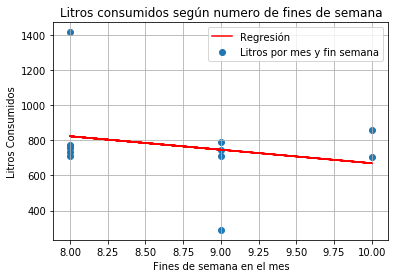

In [287]:
predic_mes = modelo_mes.predict(x)
plt.scatter(x, y)
plt.title('Litros consumidos según numero de fines de semana')
plt.plot(x, predic_mes, color='red')
plt.xlabel('Fines de semana en el mes')
plt.ylabel('Litros Consumidos')
plt.legend(["Regresión", "Litros por mes y fin semana"])
plt.grid(True)
plt.show()

Resalta que el coeficiente sea negativo y de una cantidad tan grande. Esto se debe a que las diferentes variables están e un orden de valores muy distiento, al fin y a cabo fines de semana como máximo obtenemos 10 en un mes, pero la consumicion en litros es de varios centenares llegando incluso al millar en algún caso. 
Es interesante comprobar como los meses con menos fines de semana obtienen una mayor consumición, esto es debido a uno de ellos que la consumición ha sido muy elevada, puediendo ser que ese mes en concreto sea un mes vacacional lo que implicaria un consumo mayor de cerveza.
Por último podemos observar como la precisión del modelo es de menos que un 4%, por lo que se puede decir que este modelo de regresión, es poco fiable.

#### Prediccion para diferentes fines de semana

In [298]:
numeroF = [[7], [8], [9], [10]]
pred_fines = modelo_mes.predict(numeroF)
for x in range (0, len(pred_fines)):
    if x== 0:
        print("La consumición cuando el mes tiene ", numeroF[x], "mm, se consumen ", pred_fines[x], "litros de cerveza ")
    elif x== 1:
        print("La consumición cuando el mes tiene ", numeroF[x], "mm se consumen ", pred_fines[x], "litros de cerveza ")
    elif x== 2:
        print("La consumición cuando el mes tiene", numeroF[x], "mm se consumen ", pred_fines[x], "litros de cerveza ")
    else:
        print("La consumición cuando el mes tiene", numeroF[x], "mm se consumen ", pred_fines[x], "litros de cerveza ")

La consumición cuando el mes tiene  [7] mm, se consumen  [900.771] litros de cerveza 
La consumición cuando el mes tiene  [8] mm se consumen  [823.88335] litros de cerveza 
La consumición cuando el mes tiene [9] mm se consumen  [746.9957] litros de cerveza 
La consumición cuando el mes tiene [10] mm se consumen  [670.10805] litros de cerveza 


### Explicación funcionamiento del sistema si se usaran los parametros anteriores

Los parámetros que se han visto son: Temperaturas máxima y mínima, precipitaciones y el número de fines de semana que contiene el mes.
Para poder hacer una estimación de como sería, podemos fijarnos en los diferentes coeficientes. Hay que reclacar que el coeficinte de el numero de fines de semana por mes influye sobremanera debido a la diferencia entre las unidades que se utilizan al hacer su modelo, por eso se ha considerado no tenerlo en cuenta. 
Respecto al resto, el sistema seguiria teniendo una relación positiva, debido a que el coeficiente mayor es el de la temperatura máxima y por lo tanto el que más influye. Es decir que aunque haya precipitaciones y la temperatura maxima sea alta, el consumo de cerveza sería mayor que con temperatura minima normal.